[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/main/tutorials/application-example/energy_hospital_load.ipynb)

## Building load forecasting: Hospital in SF

We can train a forecaster on another commom energy problem. In this, case we are training a 1-step ahead forecaster to predict the electricity consumption of a building.

The dataset contains one year of hourly observations.
The training will occur on 11 months of the data, reserving the last month for evaluation.

In [1]:
if "google.colab" in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes

import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

set_log_level("ERROR")

In [2]:
data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"


sf_load_df = pd.read_csv(data_location + "energy/SF_hospital_load.csv")
sf_load_df.head(3)

ds           y
0  2015-01-01 01:00:00  778.007969
1  2015-01-01 02:00:00  776.241750
2  2015-01-01 03:00:00  779.357338

### Generic forecast: Time-based features only
In this first section, we will train a model with time-features only like we would do with Facebook Prophet.

In [ ]:
m = NeuralProphet(
    weekly_seasonality=6,
    daily_seasonality=10,
    trend_reg=1,
    learning_rate=0.01,
)
df_train, df_test = m.split_df(sf_load_df, freq="H", valid_p=1.0 / 12)

metrics = m.fit(df_train, freq="H", validation_df=df_test, progress="bar")

In [4]:
metrics.tail(1)

MAE_val   RMSE_val  Loss_val  RegLoss_val  epoch        MAE       RMSE  \
108  57.975113  80.128593  0.008979          0.0    108  46.005161  63.305355   

         Loss  RegLoss  
108  0.004436      0.0

In [5]:
forecast = m.predict(df_train)
m.set_plotting_backend("plotly-static")
m.plot(forecast)

Predicting: 251it [00:00, ?it/s]

Predicting: 251it [00:00, ?it/s]

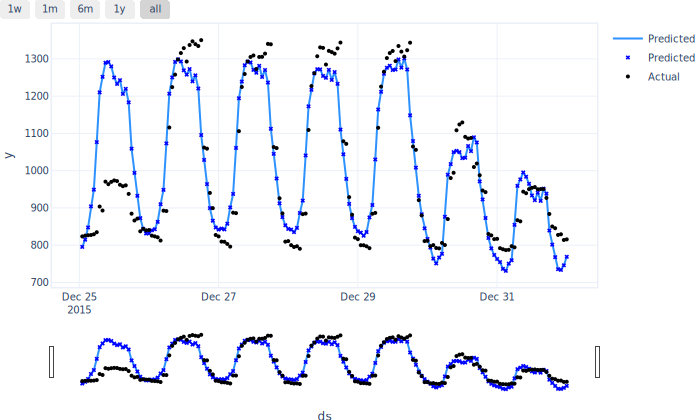

In [6]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
m.plot(forecast[-7 * 24 :])

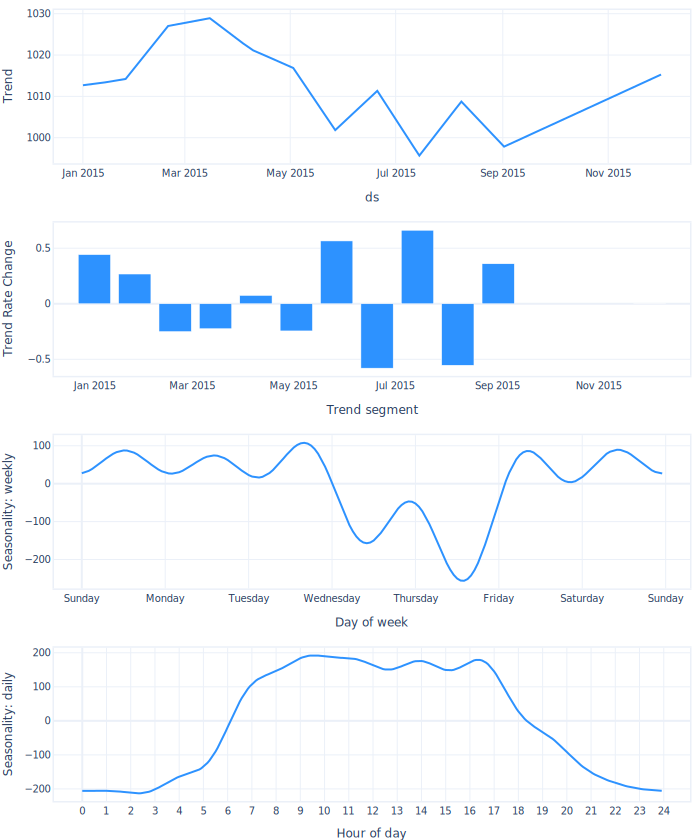

In [7]:
m.plot_parameters()

### 1-step ahead forecast with Auto-Regression

In [ ]:
m = NeuralProphet(
    growth="off",
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=3 * 24,
    ar_reg=1,
    learning_rate=0.01,
)
df_train, df_test = m.split_df(sf_load_df, freq="H", valid_p=1.0 / 12)

metrics = m.fit(df_train, freq="H", validation_df=df_test, progress="bar")

In [9]:
metrics.tail(1)

MAE_val   RMSE_val  Loss_val  RegLoss_val  epoch        MAE       RMSE  \
108  24.246571  37.293633  0.002822     0.000877    108  23.822706  35.911766   

         Loss   RegLoss  
108  0.002339  0.000877

In [10]:
forecast = m.predict(df_train)
m.set_plotting_backend("plotly-static")
m.plot(forecast)

Predicting: 249it [00:00, ?it/s]

Predicting: 249it [00:00, ?it/s]

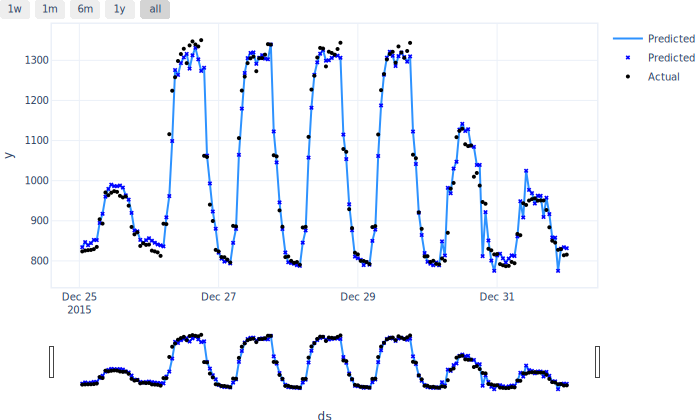

In [11]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
m.plot(forecast[-7 * 24 :])

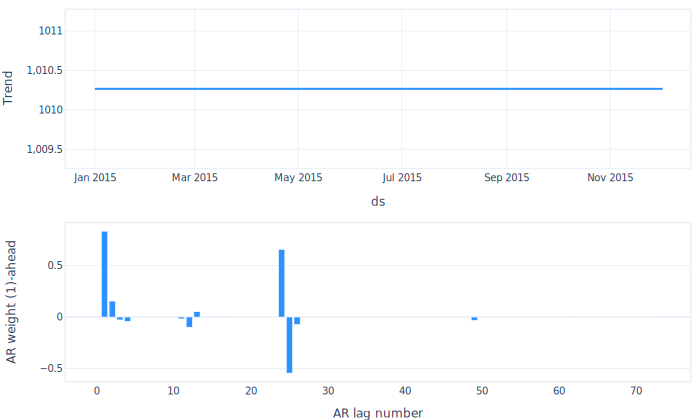

In [12]:
m.plot_parameters()

### 1 step ahead forecast with AR-Net: Using a Neural Network
Here, we will use the power of a neural Network to fit non-linear patterns.

In [ ]:
m = NeuralProphet(
    growth="off",
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=3 * 24,
    ar_layers=[32, 32, 32, 32],
    learning_rate=0.003,
)
df_train, df_test = m.split_df(sf_load_df, freq="H", valid_p=1.0 / 12)

metrics = m.fit(df_train, freq="H", validation_df=df_test, progress="bar")

In [14]:
metrics.tail(1)

MAE_val   RMSE_val  Loss_val  RegLoss_val  epoch       MAE      RMSE  \
108  7.14312  10.696775   0.00016          0.0    108  6.197587  9.060362   

         Loss  RegLoss  
108  0.000093      0.0

In [15]:
forecast = m.predict(df_train)
m.set_plotting_backend("plotly-static")
m.plot(forecast)

Predicting: 249it [00:00, ?it/s]

Predicting: 249it [00:00, ?it/s]

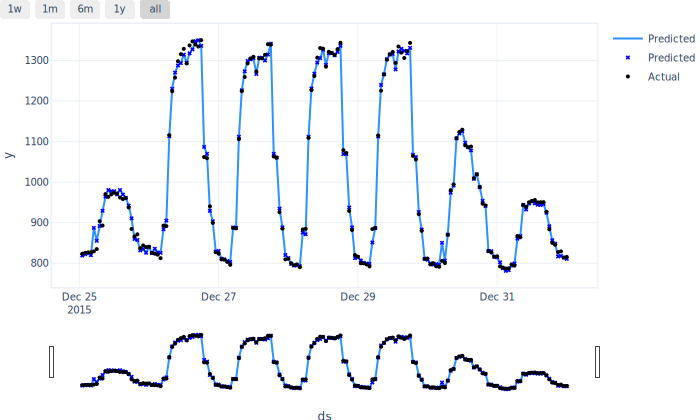

In [16]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
m.plot(forecast[-7 * 24 :])

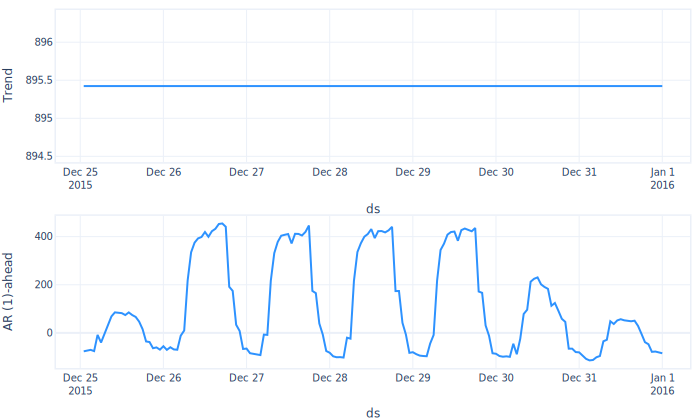

In [17]:
m.plot_components(forecast[-7 * 24 :])